In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.datasets import make_blobs, make_moons, load_breast_cancer, load_iris, load_digits

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# Несбалансированый набор классов
dignits = load_digits()
y = dignits.target == 9

X_train, X_test, y_train, y_test = train_test_split(dignits.data, y, random_state=0)

In [3]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print ('Уникальные спрогнозированные метки: {}'.format(np.unique(pred_most_frequent)))
print ('Правильность на тестовом наборе: {:.2f}'.format(dummy_majority.score(X_test,  y_test)))

Уникальные спрогнозированные метки: [False]
Правильность на тестовом наборе: 0.90


In [4]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print ("Правильность на тестовом наборе: {:.2f}".format(tree.score(X_test, y_test)))

Правильность на тестовом наборе: 0.92


In [5]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("правильность dummy: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("правильность logreg: {:.2f}".format(logreg.score(X_test, y_test)))

правильность dummy: 0.82
правильность logreg: 0.98


In [6]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print ('Confusion matrix:\n {}'.format(confusion))

Confusion matrix:
 [[401   2]
 [  8  39]]


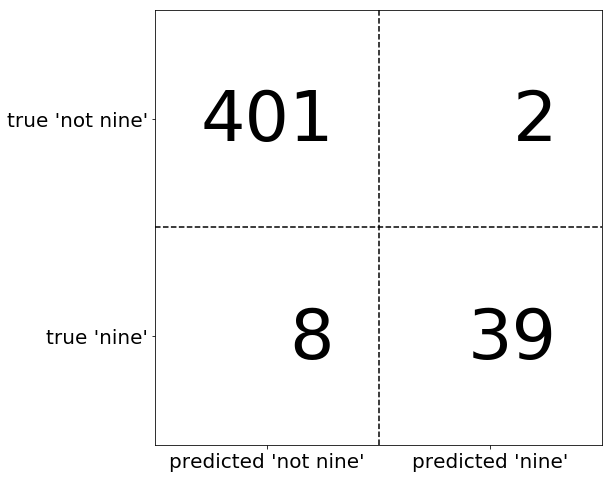

In [7]:
mglearn.plots.plot_confusion_matrix_illustration()

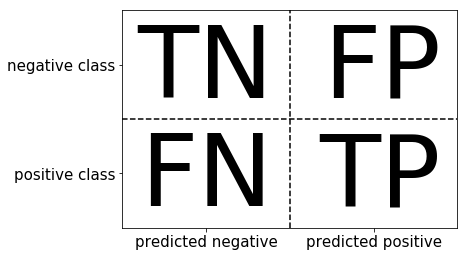

In [8]:
mglearn.plots.plot_binary_confusion_matrix()

In [9]:
print ("Наиболее часто встречающий класс: ")
print (confusion_matrix(y_test, pred_most_frequent))
print ("\nДамми-модель:")
print (confusion_matrix(y_test, pred_dummy))
print ("\nДерево решений:")
print (confusion_matrix(y_test, pred_tree))
print ("\nЛогистическая регрессия:")
print (confusion_matrix(y_test, pred_logreg))


Наиболее часто встречающий класс: 
[[403   0]
 [ 47   0]]

Дамми-модель:
[[358  45]
 [ 40   7]]

Дерево решений:
[[390  13]
 [ 24  23]]

Логистическая регрессия:
[[401   2]
 [  8  39]]


# F1 мера


In [10]:
from sklearn.metrics import f1_score
print ('f1-score наибольшая чистота:{:.2f}'.format(f1_score(y_test, pred_most_frequent)))
print ('f1-score дамии:{:.2f}'.format(f1_score(y_test, pred_dummy)))
print ('f1-score дерево:{:.2f}'.format(f1_score(y_test, pred_tree)))
print ('f1-score логистическая регресия:{:.2f}'.format(f1_score(y_test, pred_logreg)))

f1-score наибольшая чистота:0.00
f1-score дамии:0.14
f1-score дерево:0.55
f1-score логистическая регресия:0.89


C:\Apps\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
from sklearn.metrics import classification_report
print (classification_report(y_test, pred_most_frequent, target_names=['not nine', 'nine']))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



C:\Apps\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
print (classification_report(y_test, pred_dummy, target_names=['not nine', 'nine']))

             precision    recall  f1-score   support

   not nine       0.90      0.89      0.89       403
       nine       0.13      0.15      0.14        47

avg / total       0.82      0.81      0.82       450



In [13]:
print (classification_report(y_test, pred_logreg, target_names=['not nine', 'nine']))

             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



In [14]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],
random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

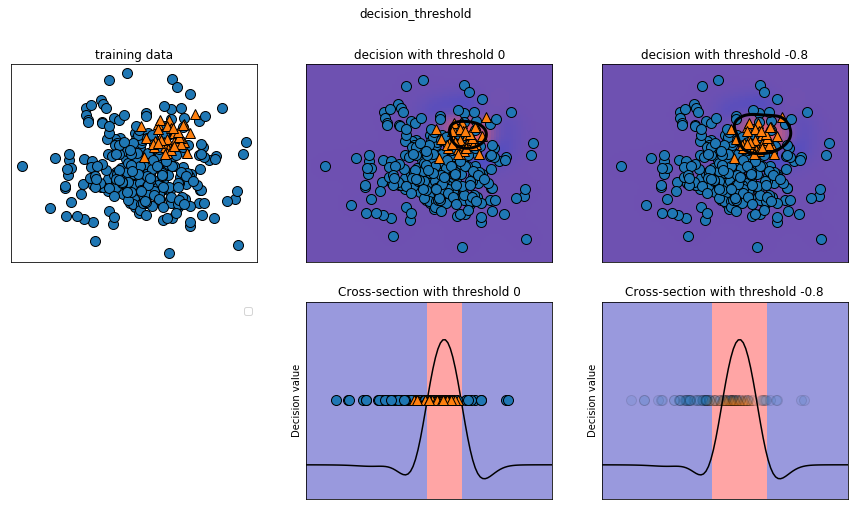

In [15]:
mglearn.plots.plot_decision_threshold()

In [16]:
print (classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [17]:
# Мы хотим увеличить количество точек данных,
# прогнозируемых как класс 1, поэтому нужно снизить пороговое значение:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [18]:
print (classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



# Кривые точности-полноты и ROC-кривые

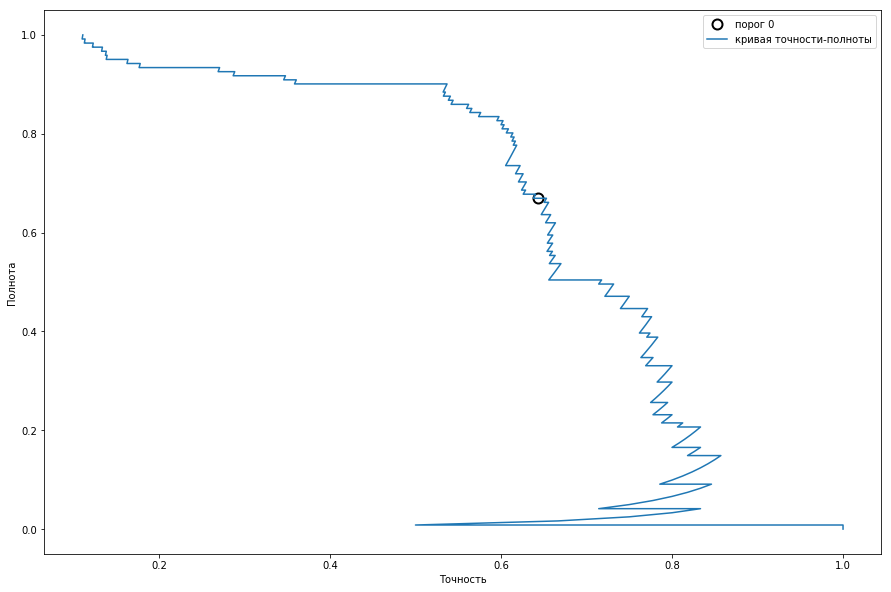

In [20]:
from sklearn.metrics import precision_recall_curve

# используем больший объем данных, чтобы получить более гладкую кривую
X, y = make_blobs(n_samples=(4000,500), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
# находим ближайший к нулю порог
close_zero = np.argmin(np.abs(thresholds))
plt.figure(figsize=(15,10))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='порог 0', fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label='кривая точности-полноты', )
plt.xlabel('Точность')
plt.ylabel('Полнота')
plt.legend(loc='best')

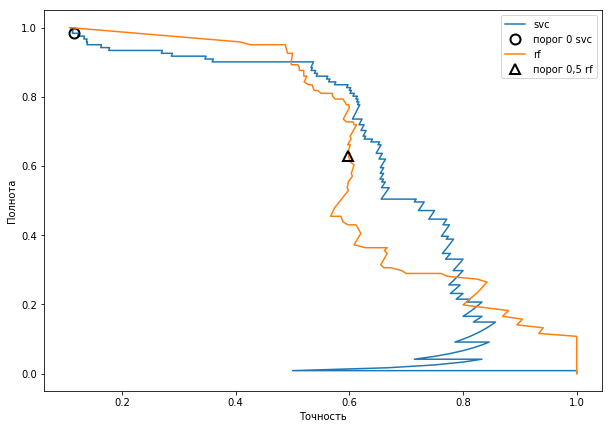

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# в RandomForestClassifier есть predict_proba, но нет decision-function
precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 7))
plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='порог 0 svc', fillstyle='none', c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')
close_default_rf = np.argmin(np.abs(threshold_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', 
         markersize=10, label='порог 0,5 rf', fillstyle='none', mew=2)
plt.xlabel('Точность')
plt.ylabel('Полнота')
plt.legend(loc='best')

In [22]:
print("f1-мера random forest: {:.3f}".format(
f1_score(y_test, rf.predict(X_test))))
print("f1-мера svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1-мера random forest: 0.610
f1-мера svc: 0.656


# Один из способов подытожить информацию кривой заключается в вычислении интеграла или площади под кривой точности-полноты, он также известен как метод средней точности (average precision)

In [23]:

from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Средняя точность random forest: {:.3f}".format(ap_rf))
print("Средняя точность svc: {:.3f}".format(ap_svc))

Средняя точность random forest: 0.660
Средняя точность svc: 0.666


# Еще один инструмент, который обычно используется для анализа поведения классификаторов при различных пороговых значениях – это кривая рабочей характеристики приемника (receiver operating characteristics curve) или кратко ROC-кривая (ROC curve). 
# Как и кривая точности-полноты, ROC-кривая позволяет рассмотреть все пороговые значения для данного классификатора, но вместо точности и полноты она показывает долю ложно положительных примеров (false positive rate, FPR) в сравнении с долей истинно положительных примеров (true positive rate).

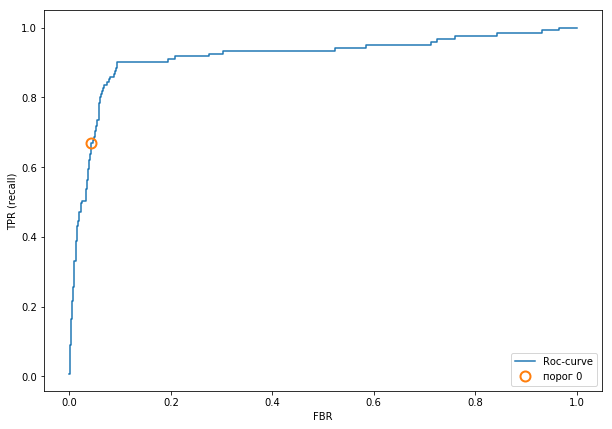

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label='Roc-curve')
plt.xlabel('FBR')
plt.ylabel('TPR (recall)')
# находим пороговое значение, ближайшее к нулю
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='порог 0', fillstyle='none', mew=2)
plt.legend(loc=4)

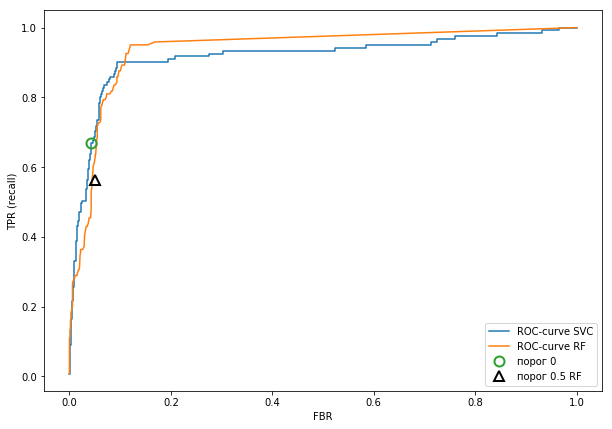

In [38]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label='ROC-curve SVC')
plt.plot(fpr_rf, tpr_rf, label='ROC-curve RF')

plt.xlabel('FBR')
plt.ylabel('TPR (recall)')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='порог 0', fillstyle='none', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10, label='порог 0.5 RF', 
         fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [41]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC для случайного леса: {:.3f}".format(rf_auc))
print("AUC для SVC: {:.3f}".format(svc_auc))

AUC для случайного леса: 0.937
AUC для SVC: 0.916


gamma = 1.00 правильность = 0.90 AUC = 0.50
gamma = 0.05 правильность = 0.90 AUC = 1.00
gamma = 0.01 правильность = 0.90 AUC = 1.00


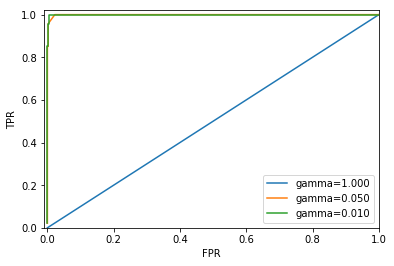

In [49]:
y = dignits.target == 9
X_train, X_test, y_train, y_test = train_test_split(dignits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f} правильность = {:.2f} AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label=('gamma={:.3f}'.format(gamma)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")